## Introduction


Data visualisation is the process of presenting data and information in graphical forms such as charts, maps, and diagrams. The goal of these graphics is to improve understanding of the underlying data by making patterns, trends, correlations, and outliers more visible than a simple study of the raw data.

There may be numerous occasions when we will need to share our data-driven results and insights. Unfortunately, raw data are not appropriate for this purpose. This is where maximising the potential of data visualisation becomes critical. In this train, we will learn how to visualise data using Python's graphing library, Matplotlib, as well as how to identify the appropriate visualisation approaches to apply based on the data we are given.

There are many different ways to represent the same data, and the choice of visualisation affects what information is conveyed to the audience. In this train, review some of the most basic (yet useful and reliable) chart options. 

Below is an image depicting some of the most popular charts used for data visualisation. 


<center><img src="https://raw.github.com/Explore-AI/Pictures/master/Introduction_to_data_visualisation_edit.jpeg?raw=true" style="float: center; padding-bottom=0.5em" width=80%/></center>

#### PLOTTING GRAAPHS
How to plot these graphs through the use of matplotlib library.

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Import Data
I'll be using "the tips " dataset , which consists of customer tip data collected over a period of twon and half moths in the early 1990.

In [2]:
data=pd.read_csv("https://raw.githubusercontent.com/Explore-AI/Public-Data/master/Data/tips.csv")
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


#### Data Preparation
Preparing data before plotting in Python is essential for various reasons. Initially, data may not be in a suitable format for direct plotting, necessitating tasks such as restructuring DataFrames and handling missing values. Additionally, data cleaning and quality assurance steps, including outlier removal and imputing missing values, ensure the accuracy of visualisations. Grouping, slicing, and aggregating the data play crucial roles in this process, allowing for the categorisation of data based on specific criteria, extraction of relevant subsets, and the creation of summarised perspectives through aggregation functions like sum, mean, or count.

By addressing these aspects during data preparation, we can optimise the data for meaningful visualisations, improving the accuracy and interpretability of insights drawn from the plotted data.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [4]:
data.head(20)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


In [11]:
title_day = data.groupby('day')[['total_bill','tip','size']].sum() #group and sum the data by the number of values for each ‘day’
title_day

,total_bill,tip,size
day,,,
Fri,325.88,51.96,40
Sat,1778.40,260.40,219
Sun,1627.16,247.39,216
Thur,1096.33,171.83,152


In [6]:
week_day = title_day.total_bill.sort_values().index #sort the indices and store them under the variable week_day
bill = title_day.total_bill.sort_values() #sort the rest of the data and store it under the variable bill

In [7]:
bill

day
Fri      325.88
Thur    1096.33
Sun     1627.16
Sat     1778.40
Name: total_bill, dtype: float64

#### Bar Graph
From the above data we can be able to identify which days of the week the restaurant was the busiest and made the most amount of money.

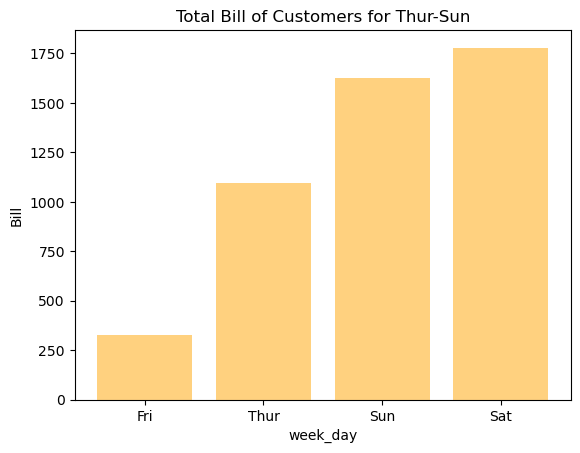

In [8]:
plt.bar(week_day,bill,alpha=0.5,color="orange")

# x and y axis labels
plt.xlabel("week_day")
plt.ylabel("Bill")

# The graph Title
plt.title("Total Bill of Customers for Thur-Sun")

# show graph
plt.show()

#### Analysis: 
From the above graph we can identify that the restaurant makes alot of money mostly on weekend. This is expected as Saturday and Sunday are usually the busiest days of the week for restaurants when people are off work.

#### Piec Chart
 plot a pie chart showing the proportion of the total meals served at the restaurant, and determine during which mealtime the server earned the most in tips.

In [12]:
titel_time=data.groupby("time")[["total_bill","tip","size"]].sum()
titel_time

,total_bill,tip,size
time,,,
Dinner,3660.30,546.07,463
Lunch,1167.47,185.51,164


In [13]:
tips=titel_time.tip.sort_values()
meal_time=titel_time.tip.sort_values().index

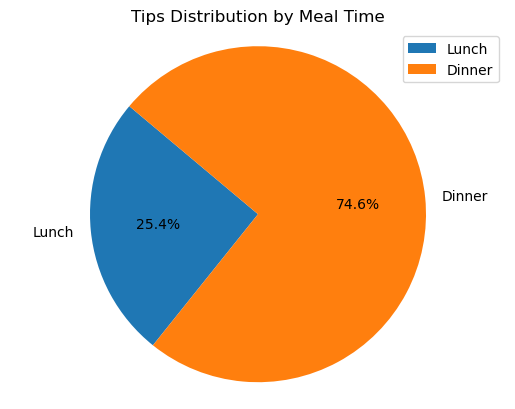

In [22]:
# Plotting the pie chart
plt.pie(tips,labels=meal_time,autopct='%1.1f%%',startangle=140)

plt.legend(loc="best")
plt.title("Tips Distribution by Meal Time")
plt.axis("equal")
plt.show()

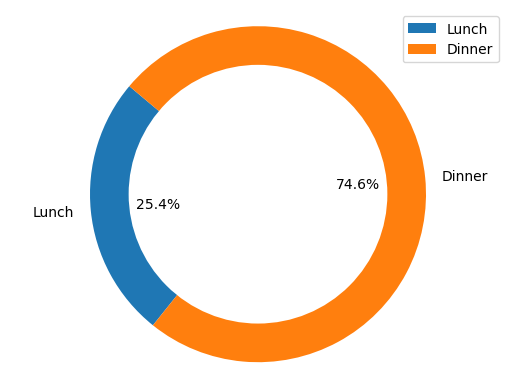

In [23]:
#Plot a donut chart

# Initially we create a pie chart as the base of our donut chart. 
plt.pie(tips, labels=meal_time, autopct='%1.1f%%', startangle=140)

# Next, we create a circle at the centre of the base plot.
centre_circle = plt.Circle((0,0),0.77, fc='white',linewidth=1.25)
fig = plt.gcf() # <-- Matplotlib command to get the current figure for further manipulation. 
# Add the circle to our base pie chart.
fig.gca().add_artist(centre_circle)

plt.legend(loc="best")
plt.axis('equal')
plt.show()

#### Line Graph
Suppose I now want to see how many meals were sold over six months at this busy restaurant. I can go ahead and create a dictionary of this information based on the total_meals sold at the restaurant from January to June 1990.

In [15]:
total_meals = {'31/01/1990': 1340, '28/02/1990': 1338, '31/03/1990': 1330, '30/04/1990': 1328, '31/05/1990': 1335, '30/06/1990': 1335}

To visualize this kind of data we can use Line graph

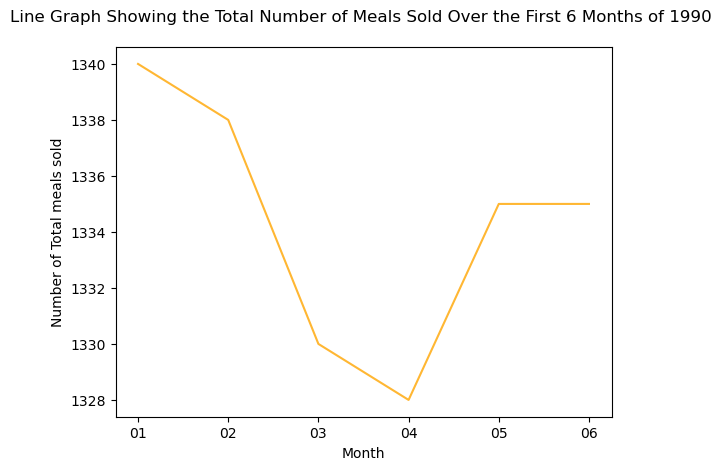

In [17]:
dates=list(total_meals.keys())
x_ax=[date[3:5] for date in dates]
y_ax=list(total_meals.values())

# plot the graph
plt.plot(x_ax,y_ax,color="orange",alpha=0.8)

# Set axis and graph titles.
plt.xlabel('Month')
plt.ylabel('Number of Total meals sold')
plt.title('Line Graph Showing the Total Number of Meals Sold Over the First 6 Months of 1990 \n')

plt.show()



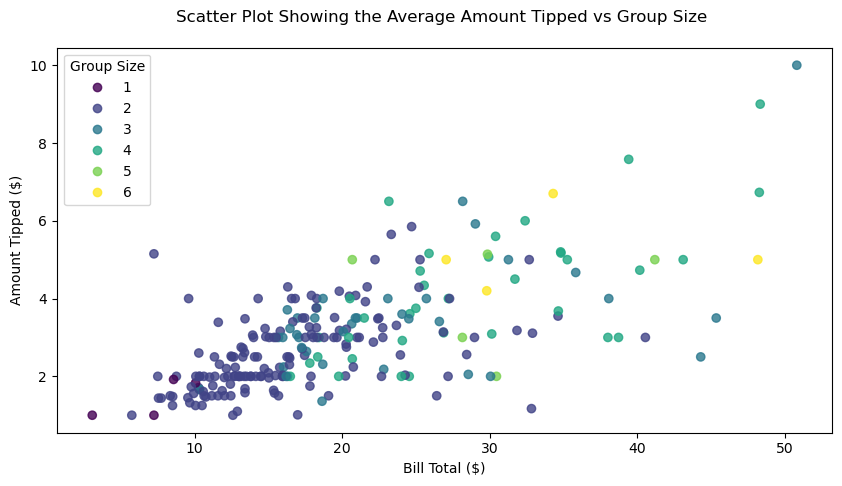

In [24]:
# For this plot, we need to access the underlying Axes object used to create our chart. 
# To display our data correctly, we also set the `figsize` argument to increase the size of the plot. 
fig, ax = plt.subplots(figsize=(10,5))

# Create the scatter plot, with the 'size' variable being coded as the marker colour. 
# We set the `alpha` parameter to make the markers slightly transparent to view overlapping points. 
scatter = ax.scatter(data['total_bill'], data['tip'], c=data['size'], alpha=0.8)

# We now create our legend based upon the underlying group size and colour assignments.
ax.legend(*scatter.legend_elements(), loc="best", title="Group Size")

# Set graph and axis titles.
plt.title('Scatter Plot Showing the Average Amount Tipped vs Group Size \n')
plt.xlabel('Bill Total ($)')
plt.ylabel('Amount Tipped ($)')

plt.show()